In [13]:
# Template code builds on the example described here: https://medium.com/@abhishekdas.nitc/nightingale-plots-in-python-using-plotly-da42bc18d15d

# Import the necessary libraries
# You will likely need to install a number of these modules/libraries 
# (e.g. pip install plotly or conda install plotly)
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
# import plotly

In [14]:
# Use pandas to read in the dataset
# Data comes from the R HistData package: https://rdrr.io/cran/HistData/man/HistData-package.html
# Thank Michael Friendly (who we read in Week 1) for providing it
df = pd.read_csv("data/nightingale.csv")

In [15]:
# Take a quick look at the data
df.head()

,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9


In [16]:
# Select the particular date range we'll use
# Diagram 1 (on the right of Nightingale's original) displays data from April 1854 to March 1855
df = df[df['Date']<'1855-04-01']

# Sort according to Date (just to be on the safe side)
df.sort_values(by=['Date'],inplace=True)

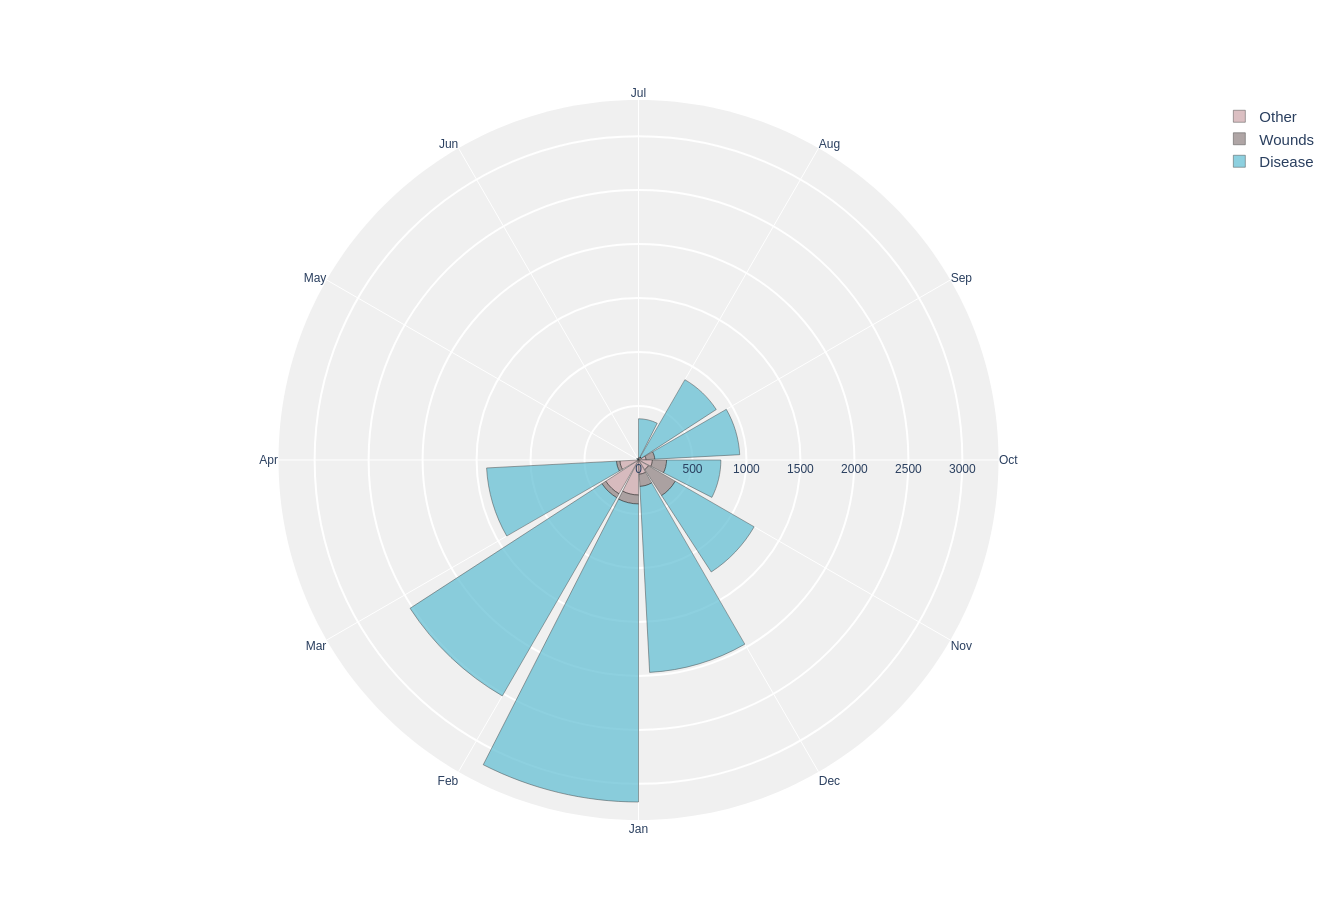

In [17]:
# These are the parameters for the Plotly visualization

#fig = make_subplots()
fig = go.Figure()

# This "trace" will display the "other" data
fig.add_trace(go.Barpolar(
    r = list(df['Other']),
    theta=list(df['Month']),
    offset=12,
    name = 'Other',
    marker_color='rgb(204,164,168)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This "trace" will display the "wounds" data
fig.add_trace(go.Barpolar(
    r = list(df['Wounds']),
    theta=list(df['Month']),
    offset=12,
    name = 'Wounds',
    marker_color='rgb(141,127,127)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This "trace" will display the "disease" data
fig.add_trace(go.Barpolar(
    r = list(df['Disease']),
    theta=list(df['Month']),
    offset=12,
    name = 'Disease',
    marker_color='rgb(93,188,210)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7   
))

# This code is responsible for the layout of your figure 
# (remember the Matplotlib "Anatomy of a Figure" at https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)
# Plotly builds on it
fig.update_layout(
    # title='Diagram of the Causes of Mortality in the Army in the East',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=180,
    width=900,
    height=900,
      
    polar = dict(
        bgcolor = "rgb(240,240,240)",
        angularaxis = 
                dict(
                    linewidth = 3,
                    showline=False,
                    direction = "clockwise",
                    linecolor='black'
                    ),
        radialaxis = 
                dict(        
                    showline = False,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),
            )
#plotly.offline.plot(fig, filename='nightingale.html')
fig.show()

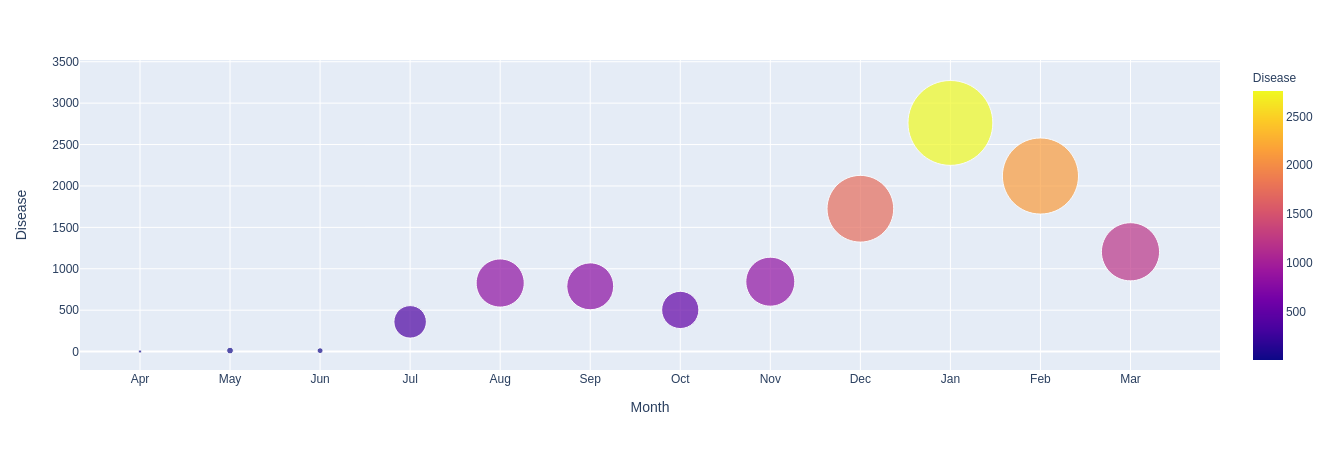

In [18]:
# bubble using plotly express
fig = px.scatter(df, 
                 x="Month", 
                 y="Disease", 
                 size="Disease.rate", 
                 color="Disease", 
                 hover_name="Disease.rate", 
                 # log_x=True,
                 size_max=60
                )
#plotly.offline.plot(fig, filename='nightingale_bubble.html')
fig.show()